# <ins> Dataset Generation </ins>

## Step1: Imports

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os

## Step 2: Generate Dataset
- Data Generation: Generate datasets using a random byte value (0-127) and a run length determined by a geometric distribution to create repeated sequences. 
- This distribution ensures that shorter runs are more common, but longer runs can still occur.

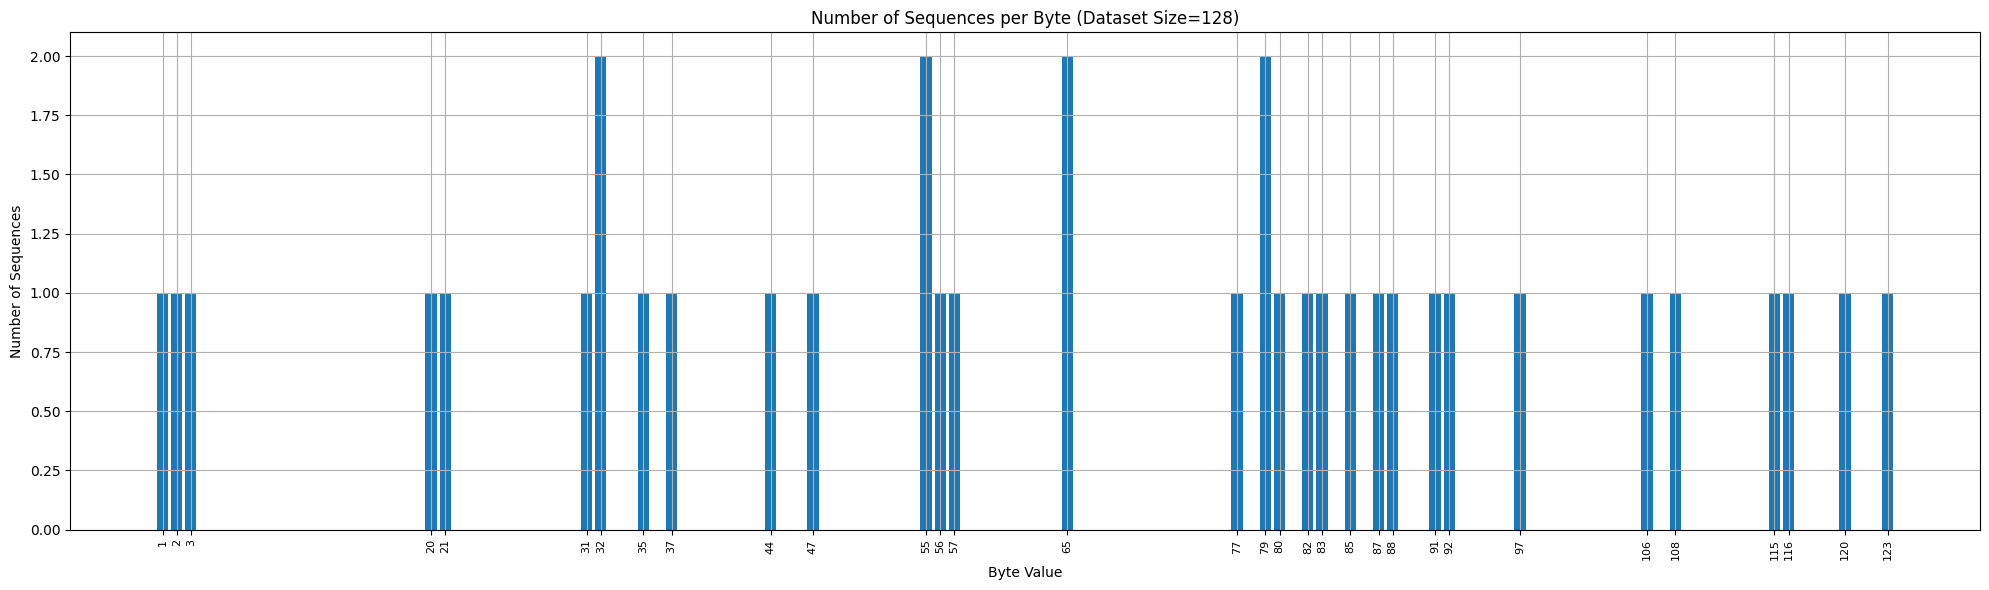

Processed dataset size 128
Unique bytes: 32
Max sequences: 2 (byte 32)
---


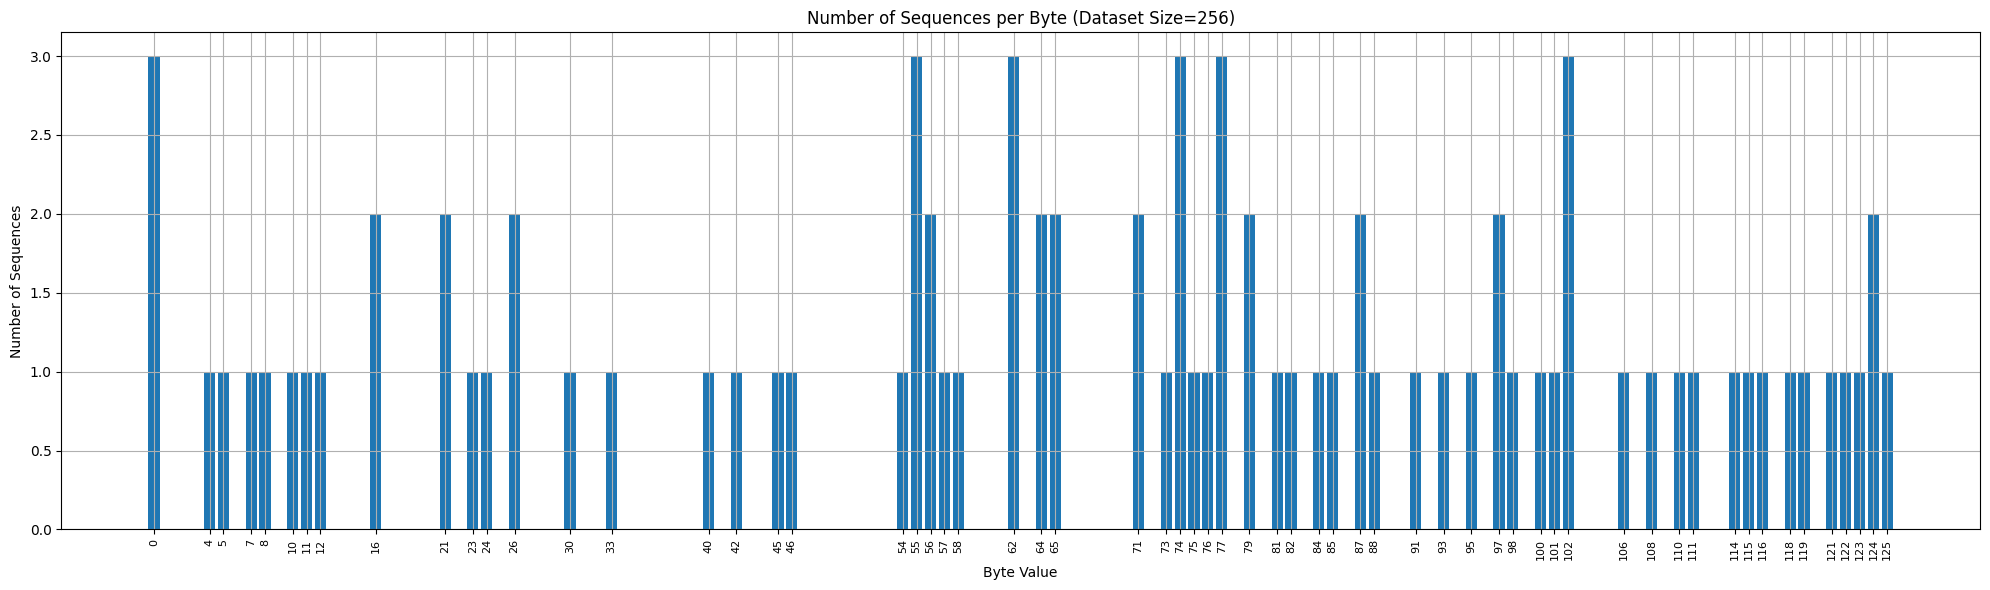

Processed dataset size 256
Unique bytes: 62
Max sequences: 3 (byte 0)
---


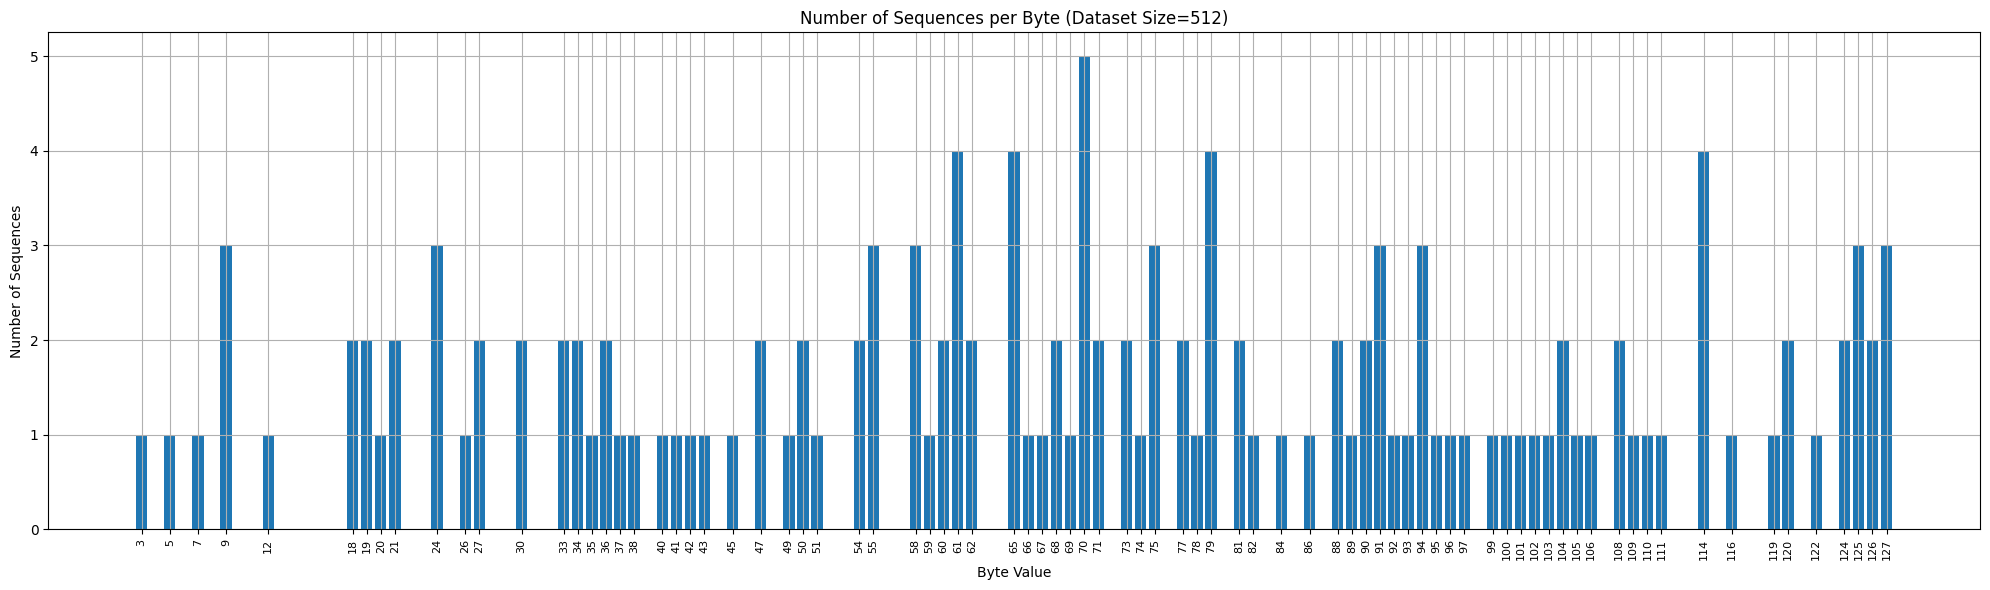

Processed dataset size 512
Unique bytes: 83
Max sequences: 5 (byte 70)
---


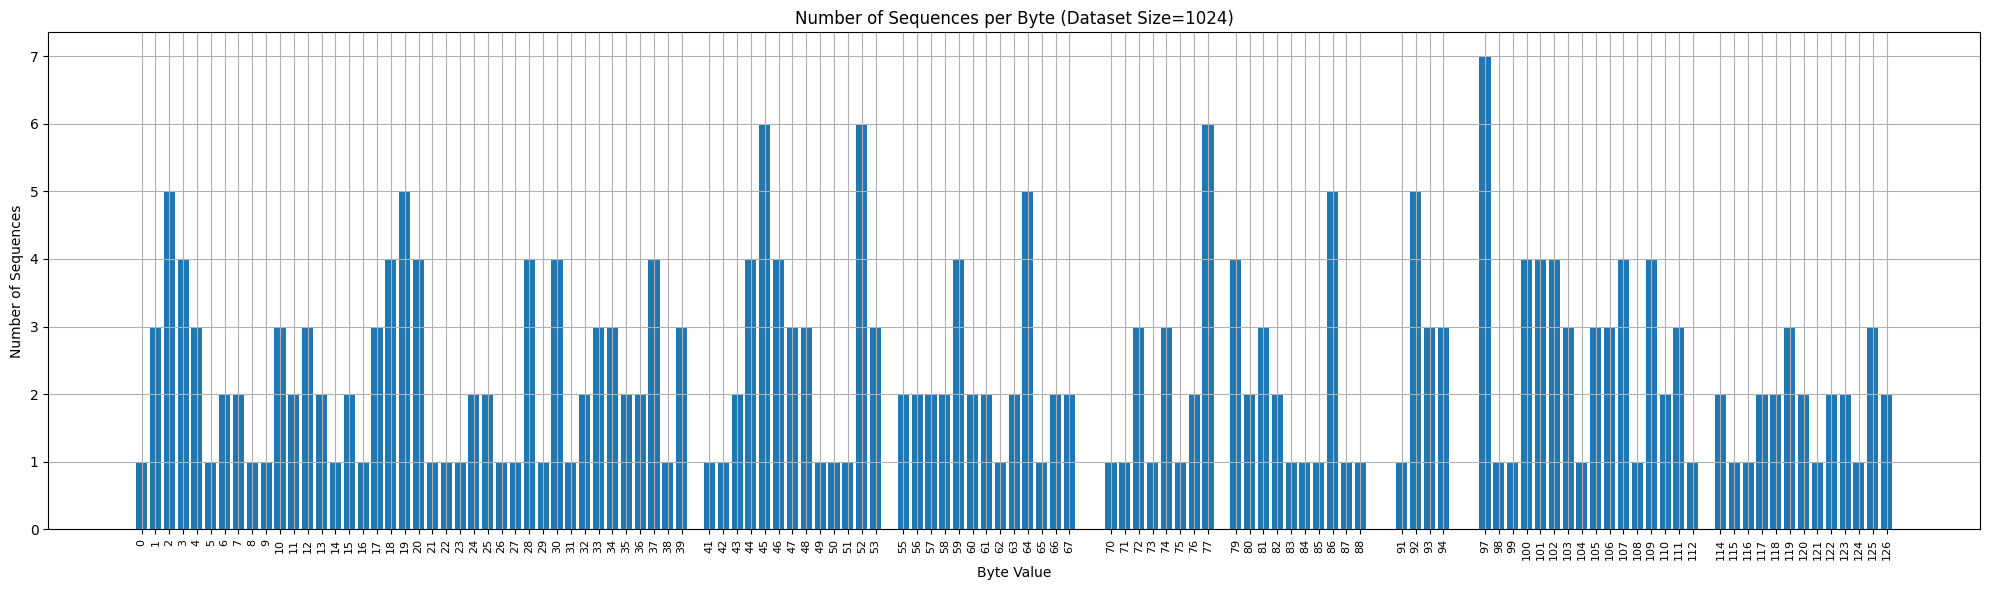

Processed dataset size 1024
Unique bytes: 117
Max sequences: 7 (byte 97)
---


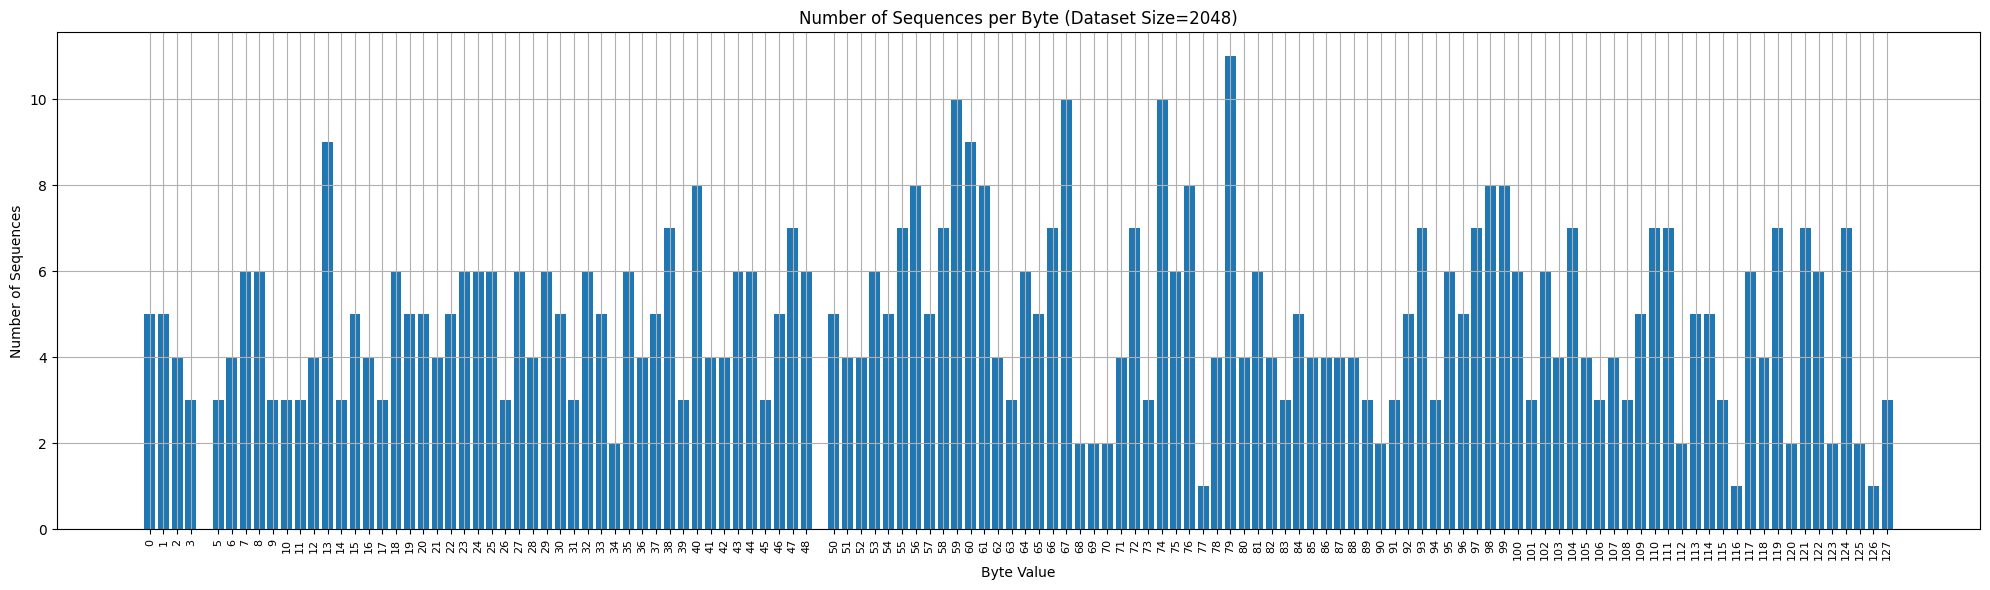

Processed dataset size 2048
Unique bytes: 126
Max sequences: 11 (byte 79)
---


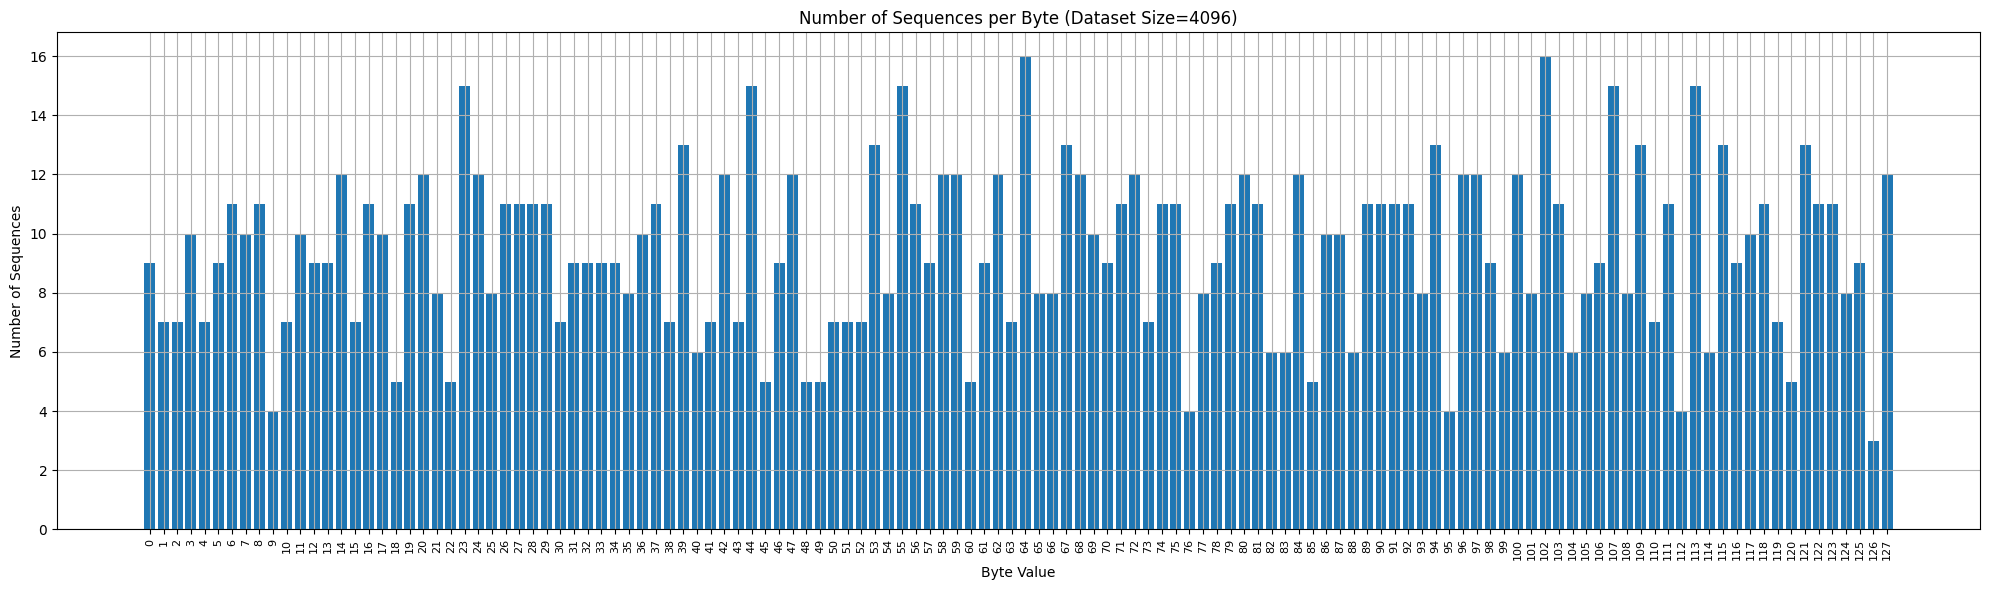

Processed dataset size 4096
Unique bytes: 128
Max sequences: 16 (byte 64)
---


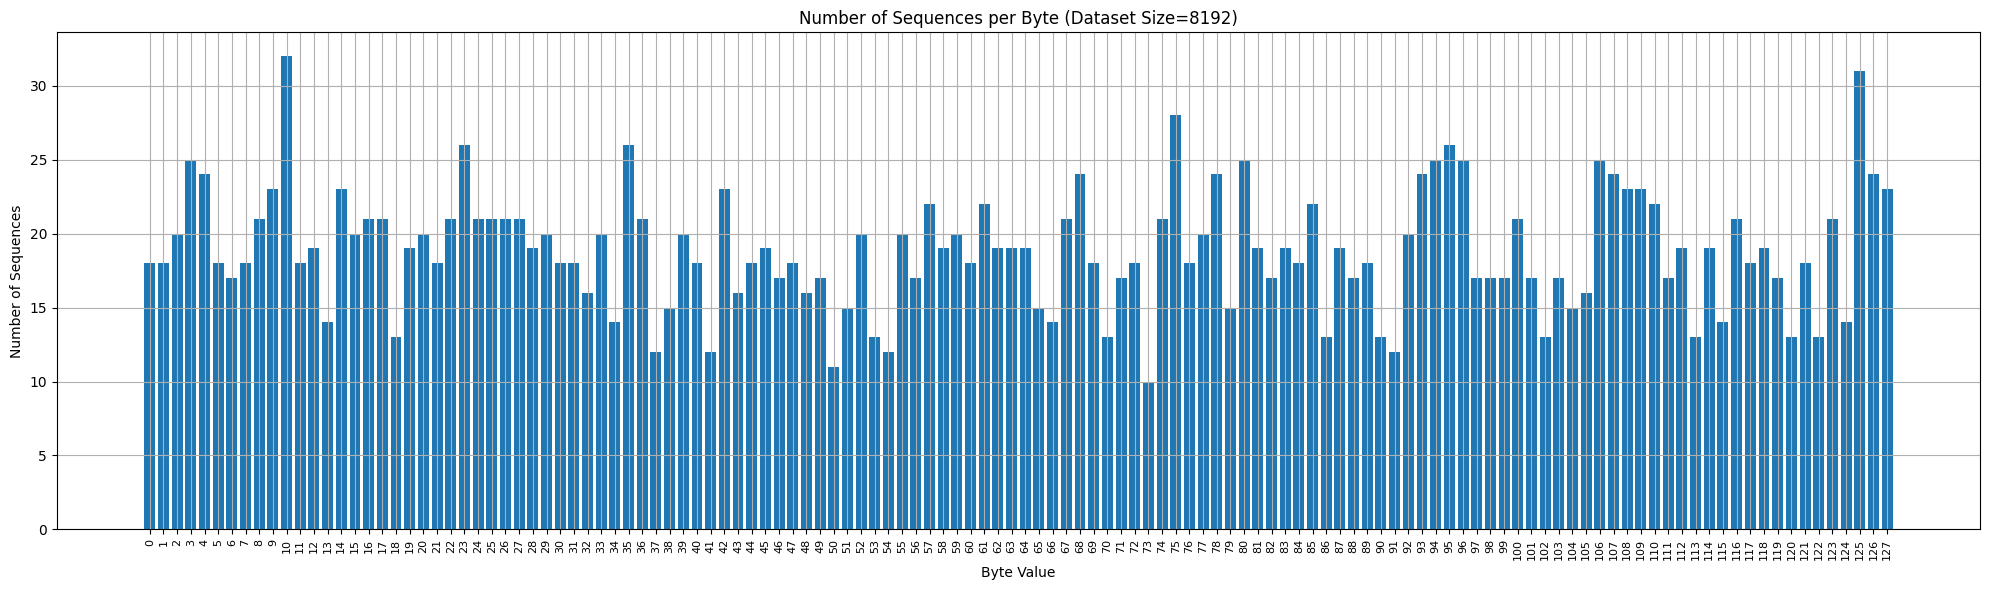

Processed dataset size 8192
Unique bytes: 128
Max sequences: 32 (byte 10)
---


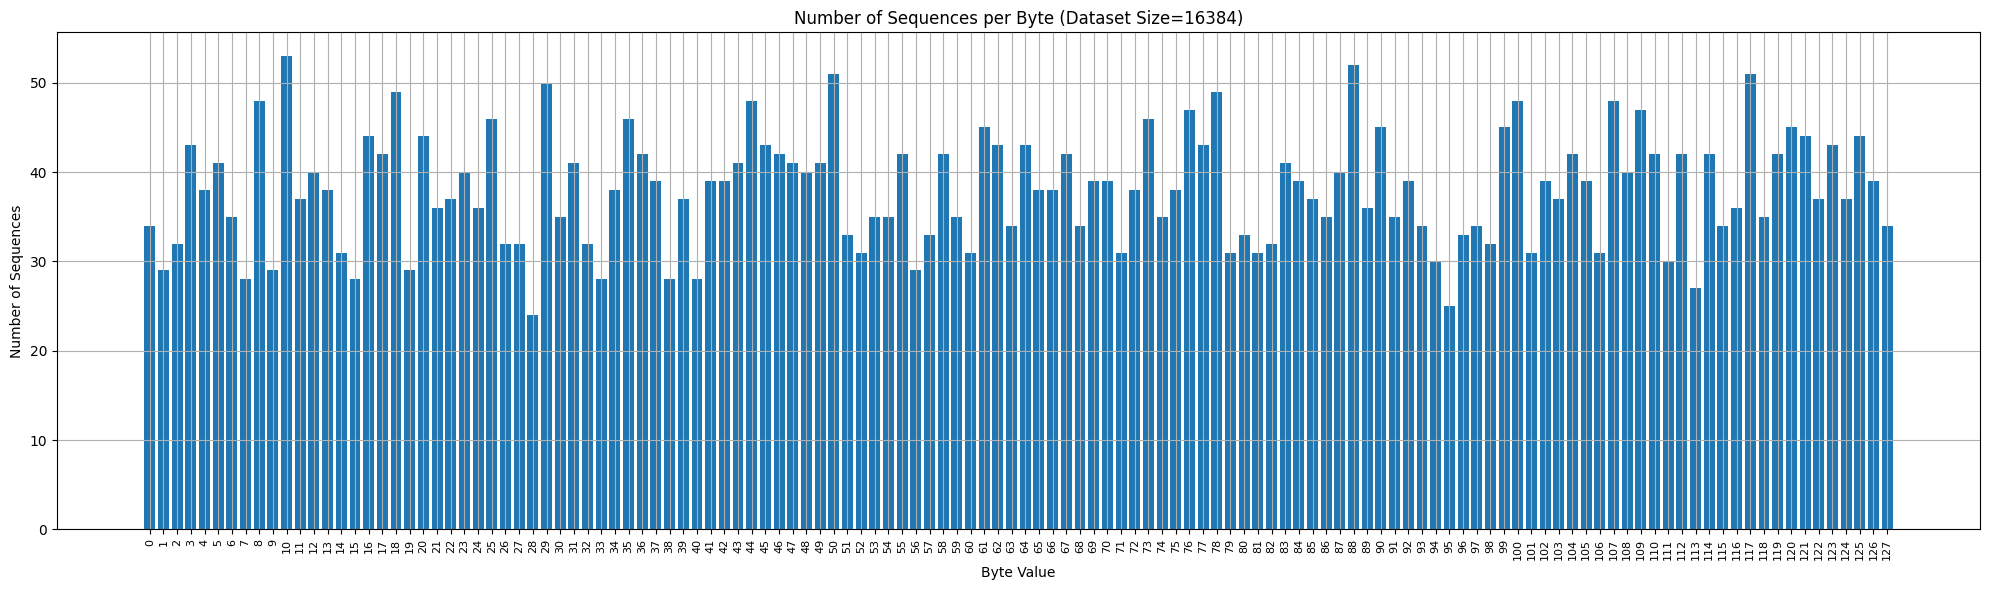

Processed dataset size 16384
Unique bytes: 128
Max sequences: 53 (byte 10)
---


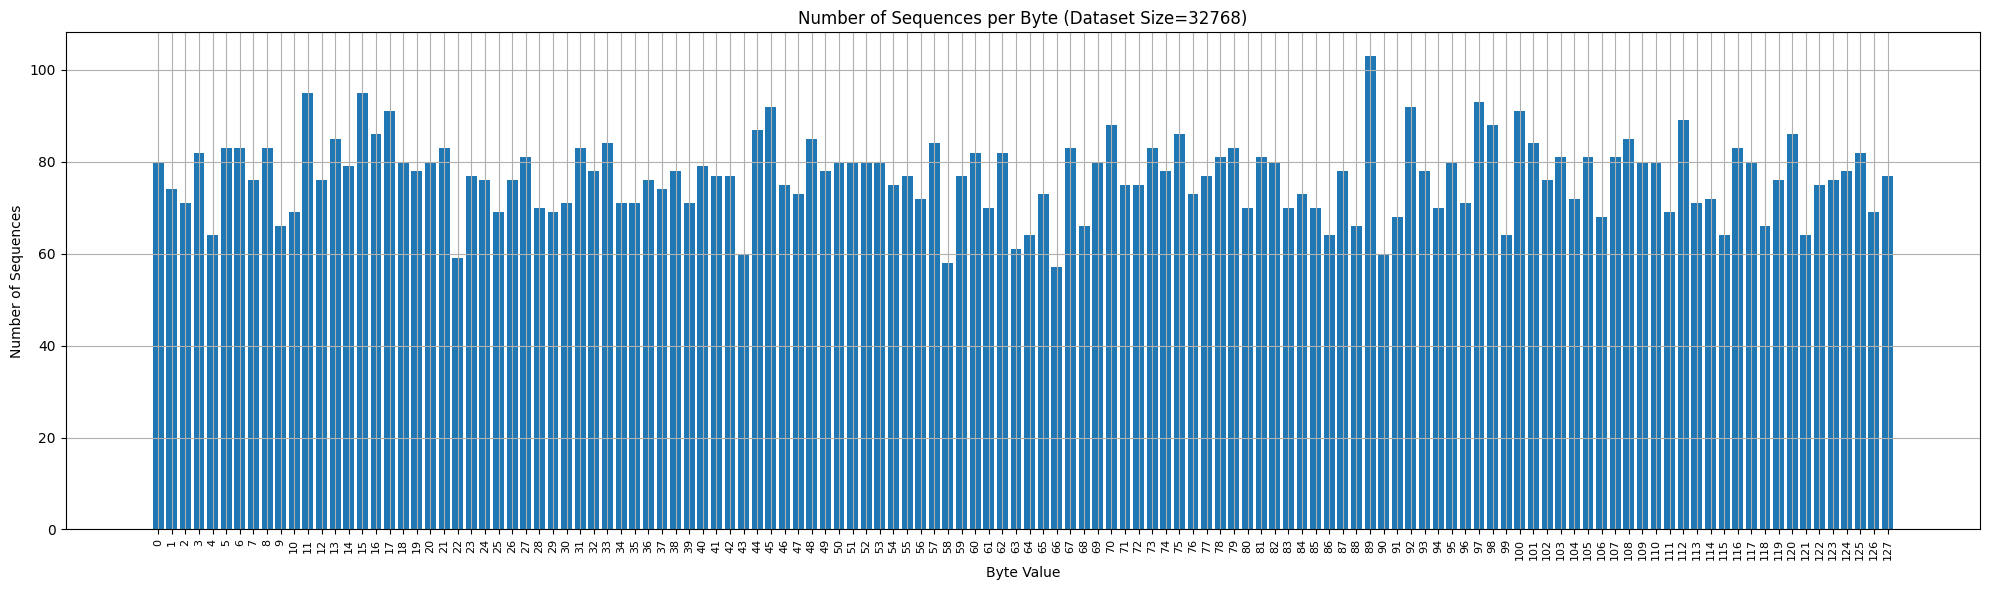

Processed dataset size 32768
Unique bytes: 128
Max sequences: 103 (byte 89)
---


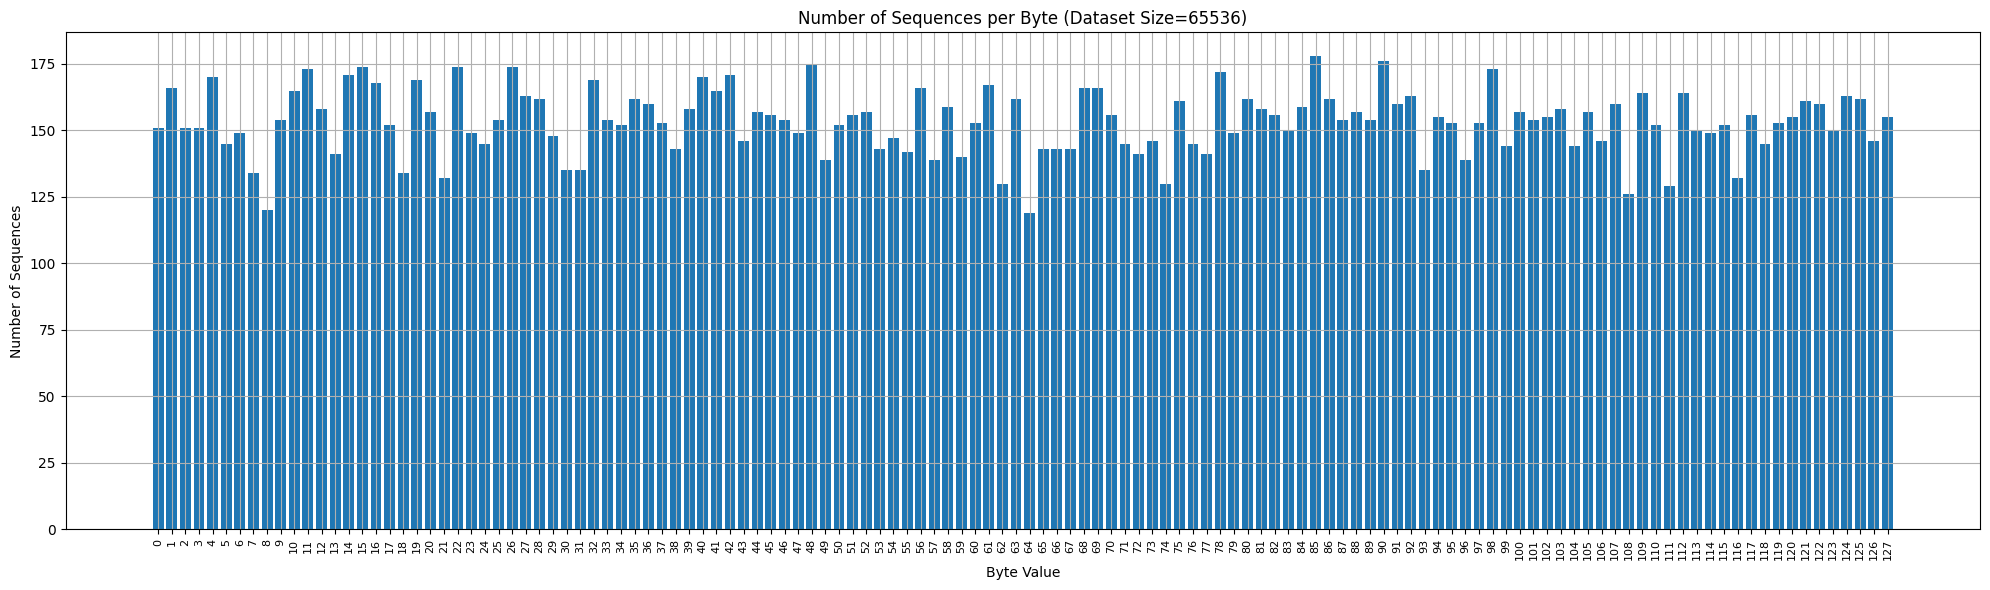

Processed dataset size 65536
Unique bytes: 128
Max sequences: 178 (byte 85)
---


In [3]:
def generate_data(target_size):
    data = []
    while len(data) < target_size:
        byte = random.randint(0, 127)
        remaining = target_size - len(data)
        if remaining <= 0:
            break
        run_length = np.random.geometric(p=0.3)
        run_length = min(run_length, remaining)
        data.extend([byte] * run_length)
    return data

def save_data(data, filename):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    # Write the data to the binary file
    with open(filename, 'wb') as f:
        f.write(bytes(data))

def analyze_frequency(data):
    frequency = [0] * 128
    for byte in data:
        frequency[byte] += 1
    return frequency

def analyze_sequences(data):
    sequences = [0] * 128
    if not data:
        return sequences
    prev_byte = data[0]
    run_length = 1
    for byte in data[1:]:
        if byte == prev_byte:
            run_length += 1
        else:
            sequences[prev_byte] += 1
            prev_byte = byte
            run_length = 1
    sequences[prev_byte] += 1
    return sequences

def plot_sequences(sequences, size):
    plt.figure(figsize=(20, 6))
    x = [i for i in range(128) if sequences[i] > 0]
    y = [sequences[i] for i in x]
    plt.bar(x, y)
    plt.title(f'Number of Sequences per Byte (Dataset Size={size})')
    plt.xlabel('Byte Value')
    plt.ylabel('Number of Sequences')
    
    # Rotate x-axis labels by 90 degrees
    plt.xticks(x, rotation=90, fontsize=8)
    
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.savefig(f'Images/sequences_{size}.png')
    plt.show()
    plt.close()

def process_dataset(size):
    data = generate_data(size)
    filename = f'Data/dataset_{size}.bin'
    save_data(data, filename)
    frequency = analyze_frequency(data)
    sequences = analyze_sequences(data)
    plot_sequences(sequences, size)
    print(f'Processed dataset size {size}')
    print(f'Unique bytes: {sum(1 for count in frequency if count > 0)}')
    print(f'Max sequences: {max(sequences)} (byte {sequences.index(max(sequences))})')
    print('---')

# Generate datasets for various sizes
sizes = [2 ** i for i in range(7, 17) if 2 ** i < 1000000]
for size in sizes:
    process_dataset(size)